In [833]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [834]:
train = pd.read_parquet("train.parquet")
train.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,target0,target1
0,32.910908,17.376350,77.557840,2.929855,gas1,20.487150,57.633085,49.245392,-44.124381,23.400064,...,14.203652,9.689942,17.951627,24.198589,102.448710,110.529868,56.817260,12.887802,27.050891,6.502743
1,41.263782,22.419445,47.945514,-25.847472,gas2,21.461239,3.474080,49.659980,-13.553188,-13.047593,...,-14.451904,-0.906120,105.724742,-9.435222,-16.060150,37.286110,61.224272,39.822424,84.127890,76.578716
2,25.580283,17.376350,77.654180,2.799411,gas1,20.487150,28.938295,49.245392,-44.124381,20.610679,...,14.395054,9.779019,17.951638,24.999453,101.728213,111.471534,52.664304,12.887802,22.080133,3.036043
3,33.756900,17.376350,73.049625,2.953982,gas1,20.487150,28.932311,49.245392,-44.124381,18.107963,...,14.184314,9.798969,17.951675,23.990300,101.312113,115.589451,56.840719,12.887802,30.234082,8.910795
4,4.223732,38.772534,48.015553,-25.843943,gas2,24.635721,12.011581,51.030938,84.244199,-17.735680,...,-14.439953,8.262354,90.187207,-2.901661,-16.060150,37.398779,40.488468,128.295838,71.128092,50.475082


# Построим 2 модели для двух разных газов

## Газ 1

In [835]:
n_gas = 1

In [836]:
df1 = train[train.feature4 == f'gas{n_gas}']

In [837]:
corr_matrix = df1.corr()

In [838]:
# get upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# df1.drop(to_drop, axis=1, inplace=True)

# find features with correlation greater than 0.95
to_drop_low = [column for column in upper.columns if any(upper[column] < -0.95)]

# df1.drop(to_drop_low, axis=1, inplace=True)

# drop highly correlated features
# df.drop(to_drop, axis=1 , inplace=True)
print(to_drop, to_drop_low)

['feature17', 'feature23'] ['feature22']


/var/folders/p6/b16fkpd508j8307_nxc17wjc0000gn/T/ipykernel_5392/2513072412.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [839]:
columns_for_predict = ['target0', 'target1']

In [840]:
col_for_del

['feature1', 'feature4', 'feature5', 'feature7', 'feature8', 'feature24']

## feature engenering

In [841]:
features = ['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'feature16', 'feature17', 'feature18', 'feature19', 'feature20',
       'feature21', 'feature22', 'feature23', 'feature24']

# features = ['feature0', 'feature1', 'feature2', 'feature3', 'feature5',
#        'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
#        'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
#        'feature16', 'feature17', 'feature18', 'feature20', 'feature21',
#        'feature22']

In [842]:
for i in to_drop:
    features.remove(i)
    
for i in to_drop_low:
    features.remove(i)

In [843]:
col_for_del = []
for col in df1.columns:
    if len(df1[col].unique()) == 1:
        col_for_del.append(col)

In [844]:
for i in col_for_del:
    print(i)
    features.remove(i, )

feature1
feature4
feature5
feature7
feature8
feature24


In [845]:
# df1[columns_for_predict] = np.log(df1[columns_for_predict])

In [846]:
# df1['feature10_exp'] = np.log(df1['feature10'])
# df1['feature13_exp'] = np.log(df1['feature13'])

# features.extend(['feature10_exp', 'feature13_exp'])
# features.extend(['feature13_exp'])

In [847]:
X = df1[features]
y = df1[columns_for_predict]

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=41)

In [849]:
### normilize data

# Scaler_x_train = StandardScaler()
# Scaler_x_test = StandardScaler()
# Scaler_y_train = StandardScaler()
# Scaler_y_test = StandardScaler()


# X_train = Scaler_x_train.fit_transform(X_train)
# y_train  = Scaler_y_train.fit_transform(y_train)

# X_test = Scaler_x_test.fit_transform(X_test)
# y_test  = Scaler_y_test.fit_transform(y_test)

In [850]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [851]:
class Net(nn.Module):
    def __init__(self, input_size=24):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc21 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 2)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = F.sigmoid(self.fc21(x))
        x = self.fc3(x)
        return x


In [852]:
def train(model, X_train, y_train, X_test, y_test, optimizer, criterion, batch_size, n_epochs):
    """
    Для обучения нейронной сети
    :param model:
    :param X_train:
    :param y_train:
    :param X_test:
    :param y_test:
    :param optimizer:
    :param criterion:
    :param batch_size:
    :param n_epochs:
    :return:
    """
    batch_no = len(X_train) // batch_size

    train_loss = 0
    # train_loss_min = np.Inf

    loss_values_train = []
    loss_values_test = []
    for epoch in range(n_epochs):
        for i in range(batch_no):
            start = i * batch_size
            end = start + batch_size
            x_var = torch.FloatTensor(X_train[start:end])
            y_var = torch.FloatTensor(y_train[start:end])

            optimizer.zero_grad()  # обнулить все градиенты
            output = model(x_var)
            loss = criterion(output, y_var)
            loss.backward()  # считаем градиент
            optimizer.step()  # вызываем пошаговую функцию оптимизатора, который обновляет свои параметры.

            train_loss += loss.item() * batch_size

        train_loss = train_loss / len(X_train)

        if epoch % 200 == 0:
            print('')
            print("Epoch: {} \tTrain Loss: {}".format(epoch + 1, train_loss))

        # test
        x_test_var = torch.FloatTensor(X_test)
        y_test_var = torch.FloatTensor(y_test)
        output = model(x_test_var)
        test_loss = criterion(output, y_test_var)
        test_loss = test_loss.item()

        loss_values_test.append(test_loss)
        loss_values_train.append(train_loss)
    return model, loss_values_train, loss_values_test

In [853]:
batch_size = 128
n_epochs = 300
model = Net(input_size=X_test.shape[1])

In [854]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

In [855]:
model, loss_values_train, loss_values_test = train(model, X_train, y_train, X_test, y_test, optimizer, criterion, batch_size, n_epochs)



Epoch: 1 	Train Loss: 28.10021927680586

Epoch: 201 	Train Loss: 0.07932814369379464


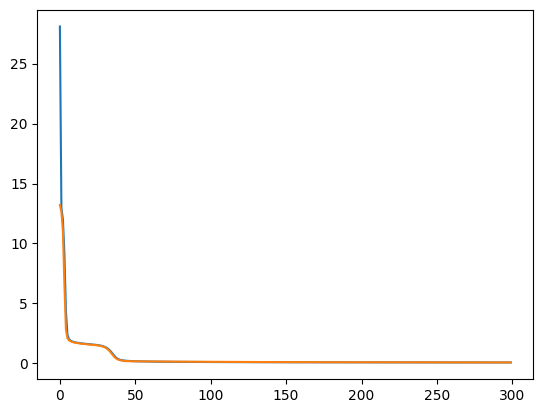

In [856]:
plt.plot(loss_values_train)
plt.plot(loss_values_test)
# plt.ylim((0,0.1))

## Test

In [859]:
X_test_var = Variable(torch.FloatTensor(X_test), requires_grad=False) 
with torch.no_grad():
    test_result = model(X_test_var)

In [860]:
# # inverse the y_test data back to 1,2,3,4
# y_new_inverse = Scaler_y_test.inverse_transform(y_test)
# y_pred_inverse = Scaler_y_test.inverse_transform(test_result)

# mean_absolute_percentage_error(y_new_inverse, y_pred_inverse)

In [861]:
mean_absolute_percentage_error(y_test, test_result)

0.023060164132225967

In [862]:
# y_test = np.exp(y_test)
# test_result = np.exp(test_result)

# mean_absolute_percentage_error(y_test, test_result)

gas 2: 0.01196633358862598

gas 1: 0.02328757962759617


с нормализацией:

gas 1: 0.04109559396261545

gas 2: 0.01588126440058686


с логарифмом:

gas 1: 0.041498254378973407


In [597]:
# mean_absolute_percentage_error(y_new_inverse, y_pred_inverse)

In [867]:
path = f'nn_gas{n_gas}.pt'

In [868]:
torch.save(model.state_dict(), path)

In [869]:
test_result

tensor([[18.7999,  4.3759],
        [22.5186,  2.2922],
        [23.9764,  2.4268],
        ...,
        [18.8220,  5.3568],
        [30.3041,  6.7004],
        [20.4989,  2.1702]])

In [870]:
features

['feature0',
 'feature2',
 'feature3',
 'feature6',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature18',
 'feature19',
 'feature20',
 'feature21']